In [90]:
import numpy as np
import pandas as pd 
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\THM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [30]:
data = pd.read_csv('train_False_Tweets.csv')

In [32]:
print('Testing data shape: ', data.shape)
data.head()

Testing data shape:  (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [66]:
data.describe(include='O')

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


In [70]:
data.duplicated().sum()

0

In [33]:
def missing_value_of_data(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percentage=round(total/data.shape[0]*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [34]:
missing_value_of_data(data)

,Total,Percentage
location,2533,33.27
keyword,61,0.80
target,0,0.00
text,0,0.00
id,0,0.00


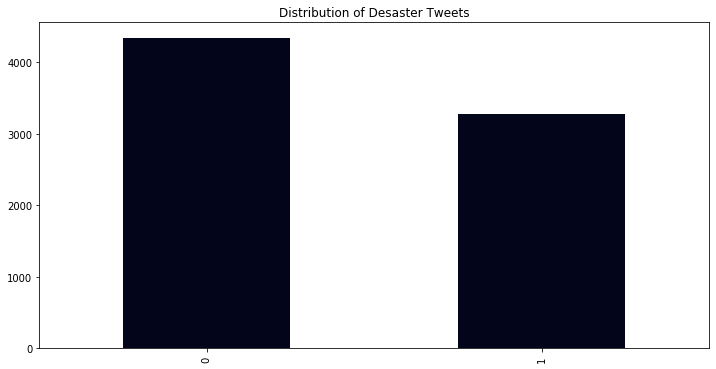

In [63]:
train['target'].value_counts().plot(kind='bar',
                                    figsize = (12,6),
                                    colormap='rocket',
                                    title='Distribution of Desaster Tweets')

In [64]:
# Exploring the target column. Let's look at what the disaster and the non disaster tweets look like
# A disaster tweet
disaster_tweets = train[train['target']==1]['text']
disaster_tweets.values[1]

'Forest fire near La Ronge Sask. Canada'

In [65]:
#not a disaster tweet
non_disaster_tweets = train[train['target']==0]['text']
non_disaster_tweets.values[1]

'I love fruits'

In [81]:
def clean_text(text):
    
    #make text lowercase
    text = text.lower()
    # remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    #remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    #remove punctuation
    text = re.sub('<.*?>+', '', text)
    #remove new line character
    text = re.sub('\n', '', text)
    #remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('_', '', text)
    
    return text

In [82]:
data['text'] = data['text'].apply(lambda x: clean_text(x))

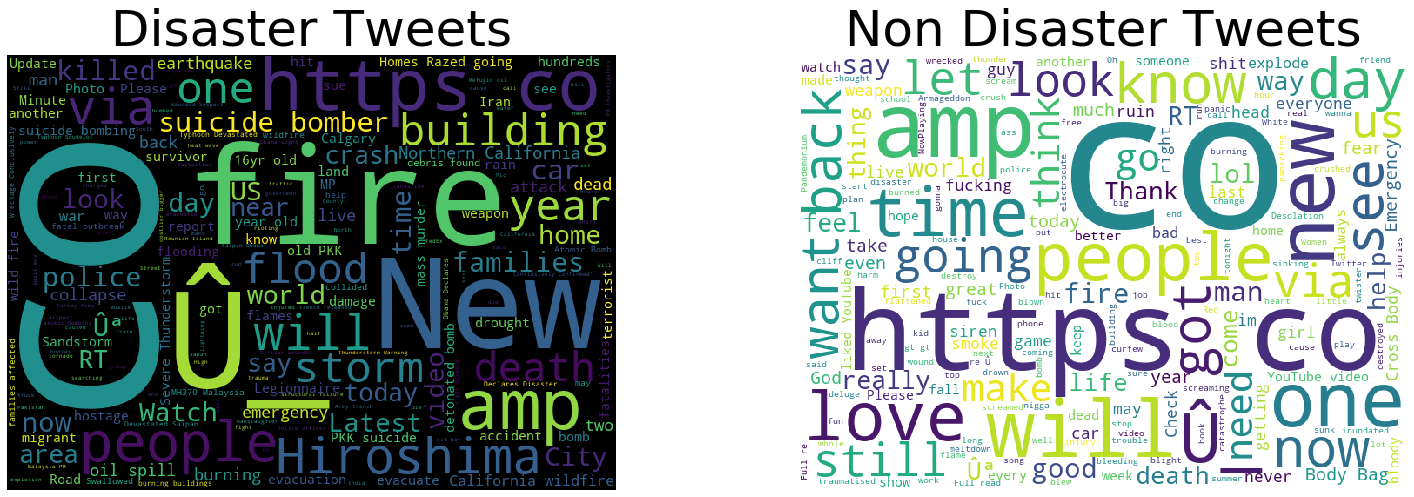

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( width=700,
                        height=500).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=50);

wordcloud2 = WordCloud(background_color='white',
                        width=700,
                        height=500).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=50);

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(lambda x: tokenizer.tokenize(x))

In [86]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[our, deeds, are, the, reason, of, this, earth...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[all, residents, asked, to, shelter, in, place...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[just, got, sent, this, photo, from, ruby, ala...",1


In [88]:
#function to remove stopwords
def remove_stopwords(text):
 
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [91]:
data['text'] = data['text'].apply(lambda x : remove_stopwords(x))

In [92]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


In [93]:
data['text'] = data['text'].apply(lambda x : ' '.join(x))
data.text

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                                       volcano hawaii
7611    police investigating e bike collided car littl...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [95]:
data.drop(['keyword','location','id'],axis=1, inplace=True)
data.head(2)

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
